In [1]:
library(ggplot2)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
df <- read.csv(file='~/ml2020_proj/hate-speech-and-offensive-language/results_2e-05_256_300.csv')
df_dup <- read.csv(file='~/ml2020_proj/hate-speech-and-offensive-language/results_2e-05_256_300_dup.csv')

In [3]:
df$pred <- recode_factor(df$pred, `1` = "Neither", `0` = "Offensive", `2` = "Hate")
df$target <- recode_factor(df$target, `1` = "Neither", `0` = "Offensive", `2` = "Hate")
df_dup$pred <- recode_factor(df_dup$pred, `1` = "Neither", `0` = "Offensive", `2` = "Hate")
df_dup$target <- recode_factor(df_dup$target, `1` = "Neither", `0` = "Offensive", `2` = "Hate")

In [4]:
df %>% count(target)

target,n
Neither,430
Offensive,1921
Hate,113


In [5]:
str(df)

'data.frame':	2464 obs. of  6 variables:
 $ X      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ text   : Factor w/ 2458 levels "<unk> , 12 hours ain't no hoe . . . &#171 <unk> this <unk> . <unk> hr plus overtime and benefits sounds real good to <unk>",..: 1509 1441 1423 1397 1392 1389 1387 1333 90 1318 ...
 $ length : int  3 3 3 3 3 3 3 3 3 3 ...
 $ pred   : Factor w/ 3 levels "Neither","Offensive",..: 2 2 2 2 2 2 2 2 2 1 ...
 $ target : Factor w/ 3 levels "Neither","Offensive",..: 2 2 2 2 2 2 2 2 2 1 ...
 $ correct: int  1 1 1 1 1 1 1 1 1 1 ...


In [6]:
df %>% group_by(pred, target) %>% summarize(n=n())

`summarise()` regrouping output by 'pred' (override with `.groups` argument)


pred,target,n
Neither,Neither,389
Neither,Offensive,83
Neither,Hate,18
Offensive,Neither,35
Offensive,Offensive,1787
Offensive,Hate,55
Hate,Neither,6
Hate,Offensive,51
Hate,Hate,40


In [7]:
df %>% group_by(target) %>% 
    mutate(n=n()) %>%
    group_by(target, pred) %>%
    mutate(prop = n()/n)

X,text,length,pred,target,correct,n,prop
0,thanksgiving break bitches,3,Offensive,Offensive,1,1921,0.93024466
1,switcharoo yo hoe,3,Offensive,Offensive,1,1921,0.93024466
2,surprise bitch &#128526,3,Offensive,Offensive,1,1921,0.93024466
3,stupid fucking cunt,3,Offensive,Offensive,1,1921,0.93024466
4,stupid bitches .,3,Offensive,Offensive,1,1921,0.93024466
5,stupid bitch &#128545,3,Offensive,Offensive,1,1921,0.93024466
6,stupid ass hoe,3,Offensive,Offensive,1,1921,0.93024466
7,stafford you pussy,3,Offensive,Offensive,1,1921,0.93024466
8,<unk> tryna hoe,3,Offensive,Offensive,1,1921,0.93024466
9,space brownies &#128125,3,Neither,Neither,1,430,0.90465116


In [8]:
df_dup %>% group_by(target) %>% 
    mutate(n=n()) %>%
    group_by(target, pred) %>%
    mutate(prop = n()/n)

X,text,length,pred,target,correct,n,prop
0,thanksgiving break bitches,3,Offensive,Offensive,1,1921,0.92712129
1,switcharoo yo hoe,3,Offensive,Offensive,1,1921,0.92712129
2,surprise bitch &#128526,3,Offensive,Offensive,1,1921,0.92712129
3,stupid fucking cunt,3,Offensive,Offensive,1,1921,0.92712129
4,stupid bitches .,3,Offensive,Offensive,1,1921,0.92712129
5,stupid bitch &#128545,3,Offensive,Offensive,1,1921,0.92712129
6,stupid ass hoe,3,Offensive,Offensive,1,1921,0.92712129
7,stafford you pussy,3,Offensive,Offensive,1,1921,0.92712129
8,<unk> tryna hoe,3,Offensive,Offensive,1,1921,0.92712129
9,space brownies &#128125,3,Hate,Hate,1,430,0.82790698


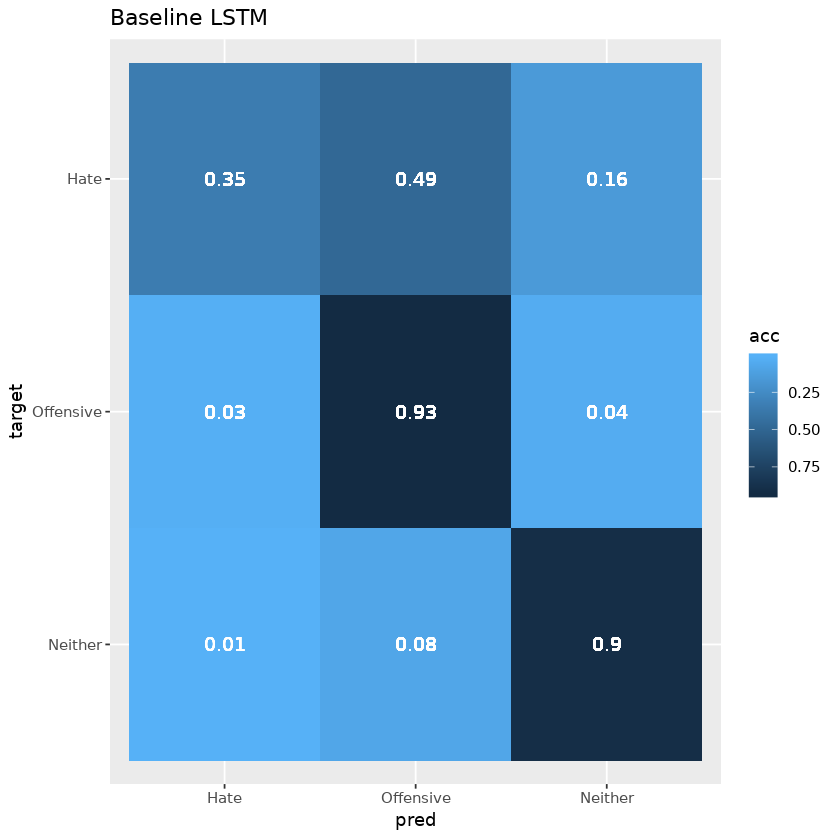

In [17]:
df %>% group_by(target) %>% 
    mutate(n=n()) %>%
    group_by(target, pred) %>%
    mutate(acc = n()/n) %>%

ggplot(aes(x=pred, y=target, fill=acc)) + 
    geom_tile() +
    scale_x_discrete(limits = rev(levels(df$pred))) +
    scale_fill_continuous(trans = 'reverse') +
    geom_text(aes(pred, target, label = round(acc, 2)), color = "white", size = 4) +
ggtitle("Baseline LSTM")


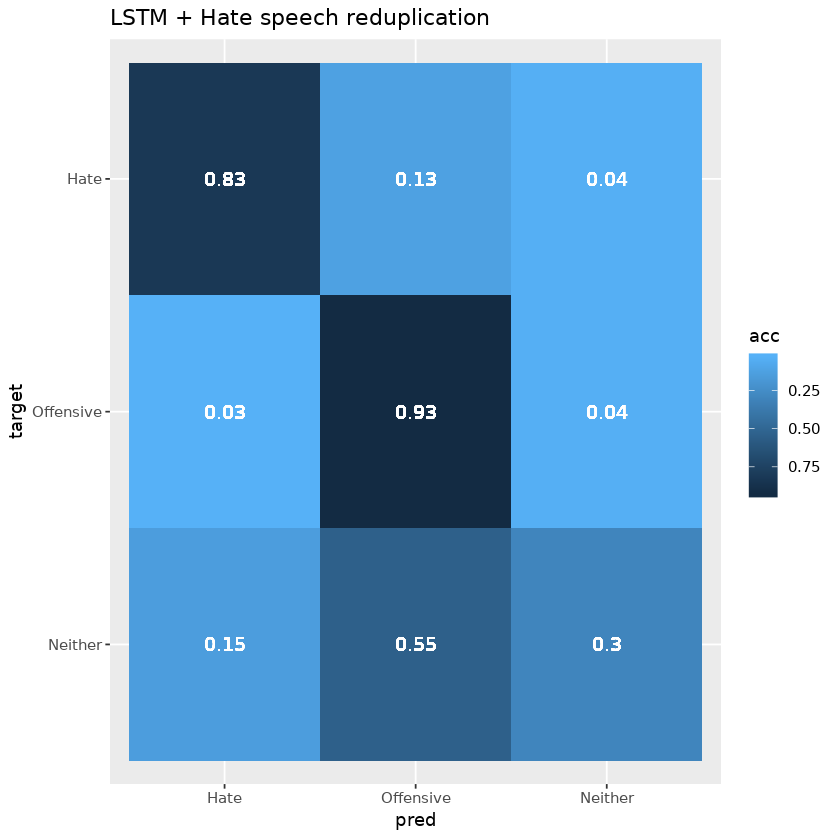

In [18]:
df_dup %>% group_by(target) %>% 
    mutate(n=n()) %>%
    group_by(target, pred) %>%
    mutate(acc = n()/n) %>%

ggplot(aes(x=pred, y=target, fill=acc)) + 
    geom_tile() +
    scale_x_discrete(limits = rev(levels(df_dup$pred))) +
    scale_fill_continuous(trans = 'reverse') +
    geom_text(aes(pred, target, label = round(acc, 2)), color = "white", size = 4) +
ggtitle("LSTM + Hate speech reduplication")

In [20]:
df %>% filter(target=="Hate", pred=="Offensive") %>% sample_n(20)

X,text,length,pred,target,correct
122,this nigglet &#10084 &#65039,4,Offensive,Hate,0
473,<unk> is a fuckin queer . . .,8,Offensive,Hate,0
50,<unk> ass hoe .,4,Offensive,Hate,0
2234,this time a night dark skin niggas really turn into lightskin niggas i swear i seen a darkie try buying starbucks <unk> ago but they closed,26,Offensive,Hate,0
1455,rt @salomanizor too many faggots on here that think they can address me by my first name,17,Offensive,Hate,0
2439,rt <unk> bitches be fallin so inlove w . <unk> &amp then he go get a new bitch &amp they try go get a new nigga to try to forget about the &#8230,33,Offensive,Hate,0
615,this nigga jerry room smell like bad pussy &#128530,9,Offensive,Hate,0
1762,stfu <unk> <unk> rt @maxin_betha cause he a faggot makes sense now right ? rt @channymaraj <unk> prolly real <unk> lol,21,Offensive,Hate,0
1858,so niggers really believe phelps just smokin on a regular huh ? tell me now &amp i'll log off for the night,22,Offensive,Hate,0
1232,think it's okay to take my property and break it ? fuck you bitch,14,Offensive,Hate,0


In [21]:
df %>% filter(target=="Hate", pred=="Neither") %>% sample_n(10)

X,text,length,pred,target,correct
1495,<unk> <unk> in the us are trash . they give <unk> in europe a bad name .,17,Neither,Hate,0
296,she got every niggah lookin like dam,7,Neither,Hate,0
2212,rt <unk> if i was obama id call a press conference &amp slit joe <unk> neck on live tv just 2 show these crackers i mean <unk>,27,Neither,Hate,0
1487,sick of your coon <unk> rt @poonsoaker <unk> rt @thotcho &#8220 henny &gt <unk> &#128128 &#128128 &#128128,17,Neither,Hate,0
1437,senator @tedcruz is an anchor baby go back from where you came . <unk> <unk> <unk>,16,Neither,Hate,0
1703,so i decided to drive to the good walmart where the colored folks don't go bc it's food here .,20,Neither,Hate,0
2192,<unk> obama is moving the country <unk> w his vision . his vision is to <unk> our <unk> country and get even w whitey . #war,26,Neither,Hate,0
2133,sorry fo da rant . it make me mad and ashamed to be colored . i wish i be white so y'all would like me,25,Neither,Hate,0
649,rt <unk> you are trash me http t .co <unk>,10,Neither,Hate,0
1982,rt commence carpet bombing all #iraq soldiers in this video http t .co <unk> executed by jihadis from <unk> http t .co <unk>,23,Neither,Hate,0


In [22]:
df %>% filter(target=="Offensive", pred=="Hate") %>% sample_n(10)

X,text,length,pred,target,correct
1131,time hop makes me realize how much off a faggot i was lol,13,Hate,Offensive,0
2034,stop snitching faggot &#8220 @ogsitti i'll snap you a nude but promise you won't <unk> don't worry baby i won't http t .co <unk>,24,Hate,Offensive,0
1031,rt <unk> only southerners know the difference between redneck and white trash .,13,Hate,Offensive,0
811,see . . . he already know he a faggot lmao,11,Hate,Offensive,0
142,that nigga <unk> so trash,5,Hate,Offensive,0
450,there are some retarded ass movies on netflix,8,Hate,Offensive,0
1504,those faggots that keep posting gay ass videos of them <unk> with their <unk> on facebook .,17,Hate,Offensive,0
1417,"stop hatin niggah , i got ya girlfriend callin you a hater niggah &#128514 &#128514 &#128514",16,Hate,Offensive,0
1235,"these nigs is haters man , and i've made myself so easy to luv",14,Hate,Offensive,0
1346,rt @sadiiex_ @vnxthny i am taking you serious . . . . kik me back nigger,16,Hate,Offensive,0


In [23]:
df %>% filter(target=="Neither", pred=="Hate") %>% sample_n(6)

X,text,length,pred,target,correct
2018,the republican <unk> governor of missouri says he's sorry he called law anglo american law . racist pig that he is . . .,24,Hate,Neither,0
1518,they use to call my mom japs when she was younger . lol asian racial slurs .,17,Hate,Neither,0
2272,republicans aren't the only racist in america . we have racist democrats too . but don't play the <unk> negro card . . . http t .co <unk>,28,Hate,Neither,0
1988,rt @trayn1gga alabama is overrated this yr the last 2 weeks has shown too many chinks in their armor wv gave them hell too,24,Hate,Neither,0
903,rt @ryancommakerry i think it's time to bring out the drunken monkey,12,Hate,Neither,0
159,sorry all my fellow negros,5,Hate,Neither,0


In [24]:
df %>% filter(target=="Neither", pred=="Offensive") %>% sample_n(10)

X,text,length,pred,target,correct
1574,<unk> of <unk> <unk> of the <unk> http t .co <unk> via @youtube &gt oriental black metal hell,18,Offensive,Neither,0
1967,so much more going on but hypocrisy doesn't sit well with me . my redneck family from central illinois more black then bieber,23,Offensive,Neither,0
1485,<unk> letter by gaza <unk> digger details <unk> under <unk> rule http t .co <unk> via <unk>,17,Offensive,Neither,0
1474,<unk> the <unk> sis <unk> the angelic sis .im the big bro lol and jigg lil <unk>,17,Offensive,Neither,0
980,stay warm &#10052 &#65039 &#127744 <unk> <unk> <unk> http t .co <unk>,12,Offensive,Neither,0
1617,there's someone riding around the robinson walmart in a <unk> <unk> . with ghetto <unk> added . <unk>,18,Offensive,Neither,0
1209,so real it's unreal lol #yankees #worldseries <unk> #mlb <unk> http t .co <unk>,14,Offensive,Neither,0
307,ready to go get my fried oreos,7,Offensive,Neither,0
763,their salsa negro is awesome . . . <unk> @loriisright,10,Offensive,Neither,0
789,rt @ryancruz_ <unk> always on my tl being ghetto &#128514 &#128514,11,Offensive,Neither,0


## duplication err analysis

In [29]:
df_dup %>% filter(target=="Hate", pred=="Neither") %>% sample_n(10)

X,text,length,pred,target,correct
571,<unk> just shoved like 8 oreos down his throat,9,Neither,Hate,0
133,them brownies tho &#128524 &#128076,5,Neither,Hate,0
1102,the republican teabaggers hate this but screw em . http t .co <unk>,13,Neither,Hate,0
1518,they use to call my mom japs when she was younger . lol asian racial slurs .,17,Neither,Hate,0
2272,republicans aren't the only racist in america . we have racist democrats too . but don't play the <unk> negro card . . . http t .co <unk>,28,Neither,Hate,0
243,that 'ouija' movie look like trash,6,Neither,Hate,0
1988,rt @trayn1gga alabama is overrated this yr the last 2 weeks has shown too many chinks in their armor wv gave them hell too,24,Neither,Hate,0
581,the redskins just begging to lose this game smh,9,Neither,Hate,0
1574,<unk> of <unk> <unk> of the <unk> http t .co <unk> via @youtube &gt oriental black metal hell,18,Neither,Hate,0
990,so much for <unk> being the team to beat they are trash,12,Neither,Hate,0


In [28]:
df_dup %>% filter(target=="Offensive", pred=="Hate") %>% sample_n(10)

X,text,length,pred,target,correct
1163,remember when i would spank everyone in meme wars ? because i do #faggots,14,Hate,Offensive,0
51,rt <unk> free wop,4,Hate,Offensive,0
2195,so is the term wigger . if someone <unk> to listen to hip hop and act a certain way it's cause of his <unk> not race,26,Hate,Offensive,0
905,rt <unk> jeter to a rod . from class to trash .,12,Hate,Offensive,0
541,rt @prettycha305 monkey see &#128585 &#128584 monkey do <unk>,9,Hate,Offensive,0
1566,tired of these butthurt <unk> commercials . ya phones trash b . . we don't want em,17,Hate,Offensive,0
551,"stay <unk> , #bitches . . . . .",9,Hate,Offensive,0
1869,seriously if you're living at someone's place for free the least you could do is help keep it clean #ratchet <unk> #hoe,22,Hate,Offensive,0
1292,s o to the homie @blakkhoodie_562 niggah stay making bomb food when we high af,15,Hate,Offensive,0
1678,these girls going to school with all kind og <unk> colored weaves in their head .fuck going on ?,19,Hate,Offensive,0


In [30]:
df_dup %>% filter(target=="Neither", pred=="Hate") %>% sample_n(10)

X,text,length,pred,target,correct
1822,<unk> its a fine <unk> killing #faggots doesn't change the source of their <unk> . which is <unk> people <unk> <unk>,21,Hate,Neither,0
1836,"twice divorced teabagger florida attorney general says marriage is reserved for <unk> , <unk> family <unk> http t .co <unk> #wtf",21,Hate,Neither,0
2017,the chinks really hunting their food . . . rt <unk> dog shot with <unk> in n .o . east http t .co <unk>,24,Hate,Neither,0
2192,<unk> obama is moving the country <unk> w his vision . his vision is to <unk> our <unk> country and get even w whitey . #war,26,Hate,Neither,0
1801,that pic is now <unk> by jihadis with a call to kill him . http t .co <unk> #saudi #isis #syria,21,Hate,Neither,0
1424,some of these hood negros don't deserve bail money the way they be visiting jail .,16,Hate,Neither,0
1982,rt commence carpet bombing all #iraq soldiers in this video http t .co <unk> executed by jihadis from <unk> http t .co <unk>,23,Hate,Neither,0
2032,trust me when i say that #jesuschrist would be killing #faggots if he came back to life in today's day and <unk> <unk> #rome,24,Hate,Neither,0
1437,senator @tedcruz is an anchor baby go back from where you came . <unk> <unk> <unk>,16,Hate,Neither,0
649,rt <unk> you are trash me http t .co <unk>,10,Hate,Neither,0


In [26]:
df_dup %>% filter(target=="Neither", pred=="Offensive") %>% sample_n(10)

X,text,length,pred,target,correct
1285,seem like da colored folk be gettin in da way lately . i just sayin,15,Offensive,Neither,0
1762,stfu <unk> <unk> rt @maxin_betha cause he a faggot makes sense now right ? rt @channymaraj <unk> prolly real <unk> lol,21,Offensive,Neither,0
1855,these hoes be lying to all of us nigga i got news for the monogamous niggas yo bitch fucking anonymous niggas,21,Offensive,Neither,0
1200,stuck up serious bitches are possibly the worst type of girls . ever .,14,Offensive,Neither,0
473,<unk> is a fuckin queer . . .,8,Offensive,Neither,0
1351,rt <unk> mine too &#128513 &#128588 &#128076 rt &#8220 @187xo_ this ma niggah <unk> &#128076 &#8221,16,Offensive,Neither,0
1594,"sir . please go text your mexican bitch , because i'm not finna deal witcho childish ass &#128514",18,Offensive,Neither,0
2439,rt <unk> bitches be fallin so inlove w . <unk> &amp then he go get a new bitch &amp they try go get a new nigga to try to forget about the &#8230,33,Offensive,Neither,0
1170,rt @xdsmooth the way this niggah just <unk> at this movie was #priceless @1bookieg,14,Offensive,Neither,0
2124,the leftist homosexual war on the <unk> church kicked into high gear with the <unk> of the <unk> by boy raping fags . . .,25,Offensive,Neither,0
